# Tree-based ensemble methods

## Lecture plan

- Review: decision trees and their limitations.  
- Key innovations:
   - Bagging
   - Boosting
   - Random forests
- Random forests in `sklearn`. 
- Why do ensembles work so well?

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Review: decision trees

> In a **decision tree**, the feature space is *split recursively* into different "regions", which can be used to make predictions about $Y$.  

*Check-in: What were some of the main advantages and disadvantages of trees?*

### Advantages and disadvantages

- Trees have some **benefits**:
   - Very easy to explain to people.  
   - Seem to mirror human decision-making.  
   - Can be displayed graphically.
- But also have some big **limitations**:
   - Prone to overfitting.  
   - Very *non-robust*.

But with some modifications, we can greatly improve the performance of tree-based approaches.

## Innovations with *ensembles*

In this section, we'll briefly discuss several **innovations** that improve the performance of **tree-based approaches**.  

- Bagging.
- Boosting.
- Random forests.

These are all examples of **ensemble learning**, in which various *weak learners* are combined to make better predictions.

### "Bagging" (bootstrap aggregation)

> In **bagging** (or *bootstrap aggregation*), multiple models are fit on different *samples* of the same dataset, increasing robustness.

- Traditional decision trees suffer from **high variance**.
   - I.e., their *fit* depends a lot on which part of the dataset they are fit to.
- Bagging *reduces variance*: fit many times, will get similar results.  
- Based on the **bootstrap**.

#### Review: bootstrapping, explained 

**Basic premise**: 

- Taking many *samples* of size $n$ (with **replacement**) from our existing dataset...
- ...calculating some sample statistic (e.g., the `mean` for each one)...
- ...will give us an estimate of the *range* of sample statistics we'd expect...
- ...given samples of the same size and distribution shape. 

By **sampling with replacement**, we can mimic the process of taking multiple samples from our population.

#### Connecting bootstrapping to bagging

**Bagging** follows the same principle as bootstrapping:

- Take $B$ samples or "training sets". 
- Build a separate prediction model $\hat{f}_b$ for each sample $b$. 
- To generate **predictions**, we take the *average* of each of these models.

$$\Large \hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^B\hat{f}_b(x)$$

#### Bagging: basic guidelines

- With bagging, we don't need to *prune* our trees.  
  - Instead, we let them grow wildly!
- For each tree, we consider *all* our predictors.
- By **averaging our predictions** across many trees, we naturally reduce the variance.  
- The average prediction tends to be much better than any given tree.
  - This is a key insight of **ensemble learning**. 

#### Bagging and *feature importances*

- With bagging, we can no longer represent our model with a *single tree*. 
   - Less *interpretable* than a traditional decision tree.
- However, we can calculate **feature importances**.

> The **importance of a feature** is calculated by considering the *total amount* that the Gini index or entropy is decreased by splits over a given predictor, averaged over all $B$ trees.

- Basic intuition: more important features will result, on average, in larger reductions in entropy between pre/post split. 

### Random forests

> **Random forests** improve upon both decision trees and bagging by considering not just a random *sample* of the data, but a random *subset* of predictors, for each tree.

- "Forest" = lots of individual trees.
   - Like bagging, random forests are **ensemble learners**.  
- "Random" = the *data* and *features* are randomly sampled across trees.

#### Bagging vs. random forests

- Like bagging, random forests use **sampling with replacement**.  
  - Fit many different models on different *samples*.
- Unlike bagging, random forests also use a random subset of **predictors**.  
  - For any given split, may only use $m$ predictors.
  - Typically, we set $m = \sqrt{p}$, i.e., no more than the square root of the total number of predictors.
  - Note: If $m = p$, then random forest = bagging.
  
Why might this improve over both bagging and decision trees?

#### The logic of random predictors

- We've already established that **random sampling with replacement** improves robustness.  
- But taking **random subsets of features** also helps fit even better models!
- Basic logic:
   - If there's one really strong predictor, then most *bagged trees* will end up relying on that one.
   - Thus, with bagging, our trees are all highly *correlated*.
   - By considering random subsets of predictors, random forests **decorrelate** our trees.
   - This **reduces overfitting** and **increases robustness**. 

### Boosting

> **Boosting** is another approach, which grows trees *sequentially* (rather than in parallel, like with bagging or random forests).

- **Basic intuition**: by fitting trees sequentially on the *residuals* of past trees, we iteratively improve model.  
- I.e., "learn from past mistakes". 

#### Boosting vs. bagging

- Like bagging, we end up fitting *many trees*.  
- Unlike bagging, we don't use *sampling with replacement* for each tree.  
- Instead, each tree is fit to *modified versions* of the original dataset.
   - Where "modified" = **residuals** from a previous tree.
   - We control this process using a shrinkage parameter $\lambda$. 
- Each new tree can be quite small. 
- Marginal improvements are also small, but overall tends to perform well.

#### Boosting algorithm

**Algorithm:** Start with a null model ($\hat{f}(x) = 0$), the residual equals to $r_i = y_i$, and a number $B$ of steps.

For each $b \in \{1, 2, \cdots, B\}$:

1. Fit a tree $\hat{f}^b(x)$ with $d$ splits (or d+1 terminal nodes).

2. Set:

$$ \hat{f}_{new}(x) = \hat{f}_{old}(x) + \lambda \hat{f}^b(x) $$

3. Set 

$$ r_{i_{new}} = r_{i_{old}} - \lambda \hat{f}^b(x) $$

At the end, you should define $\hat{f}(x)$ as:

$$ \hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x) $$

### Tree-based methods: a comparison

|Aspect|Decision trees|Bagging|Random forests|Boosting|
|------|--------------|-------|--------------|-------|
|Number of trees fit|1|$>1$|$>1$|$>1$|
|Data considered per tree|All|Random sample (with replacement)|Random sample (with replacement)|All (modified via residuals)|
|Features considered per tree|All|All|Random subset $m$|All|
|Properties|Prone to overfitting, non-robust|Lower variance, though trees are all correlated.|Lower variance, and decorrelates trees.|Lowers bias and variance.|

## Random forests in practice

- In this section, we'll discuss how to use and interpret these models in `sklearn`.  
- We'll focus on `RandomForestClassifier`, but will also discuss the other models.


### The `RandomForestClassifier`

The `RandomForestClassifier` class has several relevant parameters, including.

- `n_estimators`: number of trees in the forest.  
- `max_depth`: maximum depth of each tree. 
- `max_features`: number of features to consider for each split (e.g., `"sqrt"`). 

As with most `sklearn` models, uses the `.fit` and `.predict` syntax.

In [2]:
from sklearn.ensemble import RandomForestClassifier

#### A working dataset

- For now, we'll load the `heart.csv` dataset.  
- Contains predictors that may or may not be related to heart disease.

In [3]:
df_heart = pd.read_csv("data/classification/heart.csv")
df_heart.head(3)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


#### Extracting features

Let's start with some potentially relevant features:

- `MaxHR`: maximum heart rate
- `Chol`: cholesterol levels. 
- `Sex`.
- `Age`.
- `RestECG`: resting ECG results.  
- `ExAng`: whether they have an exercise-induced angina (chest pain).  
- `Thal`: Thallium stress test (measure of blood flowing into heart).

In [4]:
### Relevant features
X = df_heart[['MaxHR', 'Chol', 'Sex', 'Age', 'RestECG', 'ExAng', 'Thal']]
y = df_heart['AHD'].values

#### Transforming features

- Note that `Thal` is a **categorical** feature, which means we must transform it with `OneHotEncoder`.  
- `sklearn` has some handy functions to simplify this for us.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Define which columns should be encoded vs. which remain untouched
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), ['Thal']),
        ('num', 'passthrough', ['MaxHR', 'Chol', 'Age','Sex', 'RestECG', 'ExAng'])
    ]
)

In [10]:
X_transformed = column_transformer.fit_transform(X)
X_transformed.shape

(303, 10)

#### Using `train_test_split`

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.33, random_state=42)

In [13]:
clf = RandomForestClassifier(max_features="sqrt") 

In [14]:
### Fit on train set
clf.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluating model!

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [16]:
### 100% accuracy on train set!
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [17]:
### 78% on test
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.78

#### Using `confusion_matrix`

In [18]:
from sklearn.metrics import confusion_matrix

<Axes: >

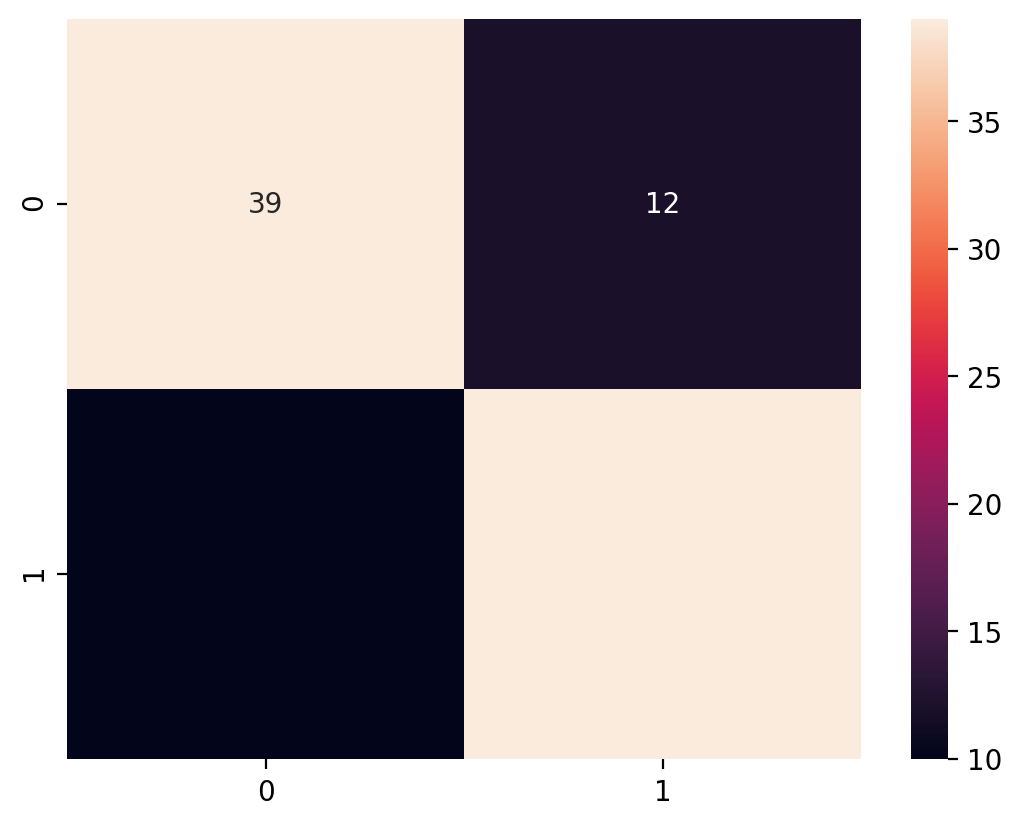

In [19]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

#### Inspecting `feature_importances`

- A `RandomForestClassifier` model doesn't have **coefficients** per se.  
- But it does have `feature_importances`.

In [20]:
fts = clf.feature_importances_
fts

array([0.00951982, 0.1253051 , 0.07126571, 0.00330819, 0.24386196,
       0.17656234, 0.18184553, 0.05893633, 0.0326028 , 0.09679222])

#### Visualizing `feature_importances`

In [21]:
df_features = pd.DataFrame({'feature_importance': fts,
                           'feature_name': column_transformer.get_feature_names_out()})
df_features = df_features.sort_values("feature_importance")

<Axes: xlabel='feature_importance', ylabel='feature_name'>

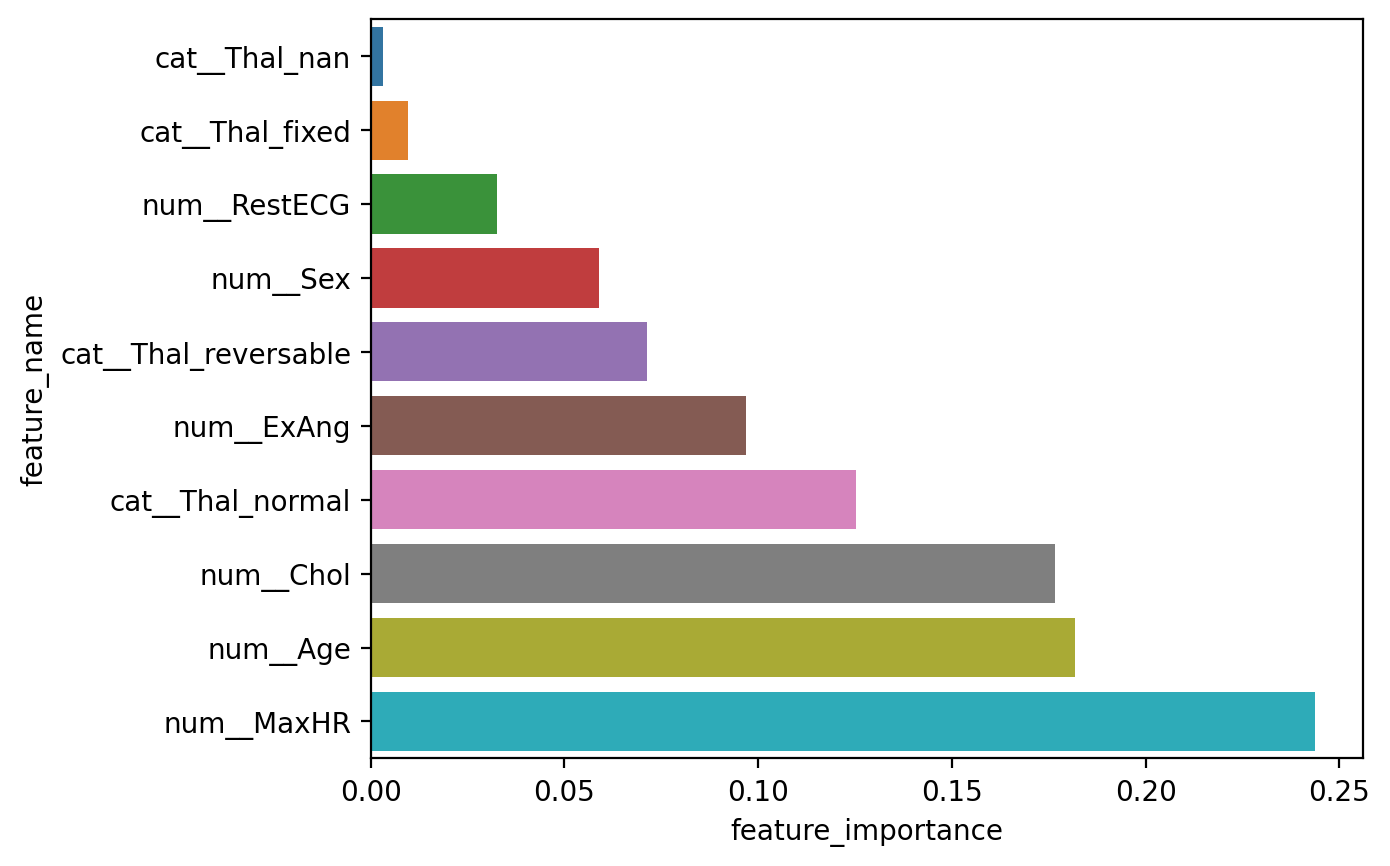

In [22]:
sns.barplot(data = df_features, y = "feature_name",
           x = "feature_importance")

### The other models we've discussed

In [23]:
### Bagging classifier
from sklearn.ensemble import BaggingClassifier

In [24]:
### Boosting classifiers
from sklearn.ensemble import GradientBoostingClassifier

## Why do ensembles work so well?

- All of these approaches involve **ensemble learning**. 
- In general, *ensembles* tend to out-perform individual learners.  
   - **Diversity among models** improves robustness, reduces variance.  
   - Tends to **reduce overfitting**.  
- Connects to [wisdom of the crowd](https://en.wikipedia.org/wiki/Wisdom_of_the_crowd).  
  - The *average* of many "guesses" is better than any particular guess.

## Lecture wrap-up

- Traditional decision trees tend to **overfit**.  
- We can improve upon decision trees using **ensemble learning**.  
   - Example: *random forests* randomly sample subsets of *features* and *data*.
- These models also yield `feature_importances`, a measure of which features are most useful. 
- Ensemble learners work by averaging the **wisdom of the crowd**. 